# 1章 Python入門
PyTorchを使ったディープラーニング・プログラミングで重要になる概念だけを抜き出して説明する

In [29]:
# PDF印刷用
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

try:
    from google.colab import files
except:
    pass

pdf_ind = 2
pdf_base = 'pdf-01-'

def create_pdf(plt):
    global pdf_ind, pdf_base
    fn = f'{pdf_base}{pdf_ind:02d}.pdf'
    print(fn)
    plt.savefig(fn)
    try:
        files.download(fn)
    except:
        pass
    pdf_ind = pdf_ind + 1


In [2]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1

In [3]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=5)

## 1.1 コンテナ変数にご用心
Pythonでは、変数は単に実際のデータ構造へのポインタに過ぎない。  
Numpy配列などでは、このことを意識しないと思わぬ結果を招く場合がある。

### NumPy変数間

In [5]:
# Numpy配列 x1 を定義
x = np.array([5, 7, 9])

# 変数x2にx1を代入する
# このとき、実体は共通なまま
y = x

# 結果確認
print(x)
print(y)

[5 7 9]
[5 7 9]


In [6]:
# ここでx1の特定の要素の値を変更する
x[1] = -1

# すると、x2も連動して値が変わる
print(x)
print(y)

[ 5 -1  9]
[ 5 -1  9]


In [7]:
# yも同時に変化して困る場合は、代入時にcopy関数を利用する
x = np.array([5, 7, 9])
y = x.copy()

# すると、x1の特定の要素値の変更がx2に影響しなくなる
x[1] = -1
print(x)
print(y)

[ 5 -1  9]
[5 7 9]


### テンソルとNumPy間

In [8]:
import torch

# x1: shape=[5] となるすべて値が1テンソル
x1 = torch.ones(5)

# 結果確認
print(x1)

# x2 x1から生成したNumPy
x2 = x1.data.numpy()

# 結果確認
print(x2)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [9]:
# x2の値を変更
x1[1] = -1

# 連動してx3の値も変わる
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


In [10]:
# 安全な方法

# x1 テンソル
x1 = torch.ones(5)

# x2 x1から生成したNumPy
x2 = x1.data.numpy().copy()

x1[1] = -1

# 結果確認
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


## 1.2 関数を引数とする関数
Pythonでは、関数もまた、変数名は単なるポインタで、実体は別にある。  
このことを利用すると、「関数を引数とする関数」を作ることが可能になる。  

$f(x) = 2x^2 + 2$を関数として定義する

In [11]:
def f(x):
    return (2 * x**2 + 2)

In [18]:
# xをnumpy配列で定義
x = np.arange(-2, 2.1, 0.25)
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [19]:
# f(x)の結果をyに代入
y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


In [28]:
!pwd

/Users/makaishi/Documents/Github/PyTorch/pytorch-book-doc/notebooks


pdf-02.pdf


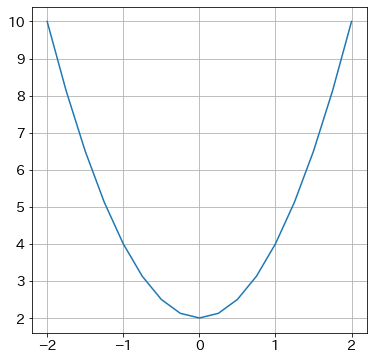

In [27]:
# 関数のグラフ表示

plt.plot(x, y)
plt.show()

ここで関数を数値微分する関数``diff``を定義する。  
数値微分の計算には、普通の微分の定義式よりいい近似式である $f'(x) = \dfrac{f(x+h)-f(x-h)}{2h}$を利用する。

In [31]:
# 関数を微分する関数diffの定義
# 関数の引数はdiffの2つ目の引数として受ける
def diff(f, x):
    h = 1e-6
    return (f(x+h) - f(x-h)) / (2*h)

In [32]:
# f(x)に対して数値微分を行う
# xのそれぞれの値に対する計算結果をy_dashに保存する
y_dash = diff(f, x)
print(y_dash)

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


pdf-01-02.pdf


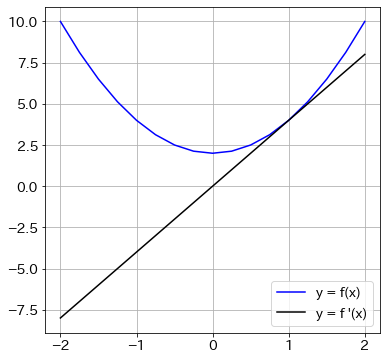

In [33]:
# 結果のグラフ表示
plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()

シグモイド関数 $g(x) = \dfrac{1}{1 + \exp(-x)}$に対して同じことをやってみる。

In [34]:
# シグモイド関数の定義
def g(x):
    return 1 / (1 + np.exp(-x))

In [35]:
# シグモイド関数の計算
y = g(x)
print(y)

[0.1192  0.14805 0.18243 0.2227  0.26894 0.32082 0.37754 0.43782 0.5
 0.56218 0.62246 0.67918 0.73106 0.7773  0.81757 0.85195 0.8808 ]


pdf-01-03.pdf


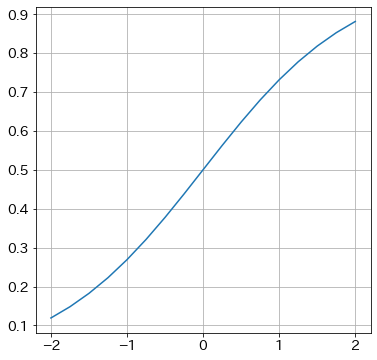

In [36]:
# 関数のグラフ表示

plt.plot(x, y)
plt.show()

In [37]:
# シグモイド関数の数値微分
y_dash = diff(g, x)
print(y_dash)

[0.10499 0.12613 0.14915 0.1731  0.19661 0.21789 0.235   0.24613 0.25
 0.24613 0.235   0.21789 0.19661 0.1731  0.14915 0.12613 0.10499]


pdf-01-04.pdf


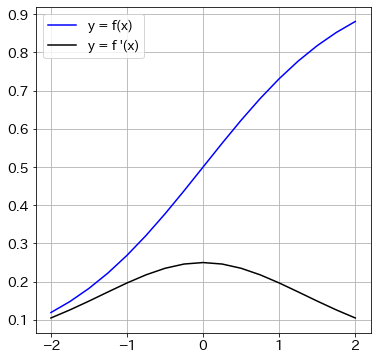

In [38]:
# 結果のグラフ表示
plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()

シグモイド関数の微分結果は$y(1-y)$となることがわかっている。  
これはyの二次関数で、$y=\dfrac{1}{2}$の時に最大値$\dfrac{1}{4}$を取る。  
上のグラフはその結果と一致していて、数値微分が正しくできていることがわかる。

## 1.3 オブジェクト指向プログラミング入門

In [39]:
# グラフ描画用ライブラリ
import matplotlib.pyplot as plt

# 円描画に必要なライブラリ
import matplotlib.patches as patches

In [40]:
# クラス Point の定義

class Point:
    # インスタンス生成時にxとyの２つの引数を持つ
    def __init__(self, x, y):
        # インスタンスの属性xに第一引数をセットする
        self.x = x
        # インスタンスの属性yに第二引数をセットする
        self.y = y
    # 描画関数 drawの定義 (引数はなし)
    def draw(self):
        # (x, y)に点を描画する
        plt.plot(self.x, self.y, marker='o', markersize=10, c='k')

In [41]:
# クラスPointからインスタンス変数p1とp2を生成する
p1 = Point(2,3)
p2 = Point(-1, -2)

In [42]:
# p1とp2の属性x, yの参照
print(p1.x, p1.y)
print(p2.x, p2.y)

2 3
-1 -2


pdf-01-05.pdf


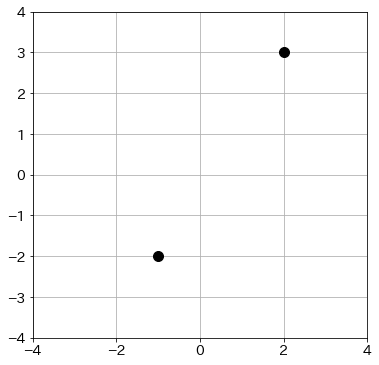

In [54]:
# p1とp2のdraw関数を呼び出し、2つの点を描画する
p1.draw()
p2.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

In [44]:
# Pointの子クラスCircleの定義その1
class Circle1(Point):
    # Circleはインスタンス生成時に引数x,y,rを持つ
    def __init__(self, x, y, r):
        # xとyは、親クラスの属性として設定
        super().__init__(x, y)
        # rは、Circleの属性として設定
        self.r = r
     
    # この段階でdraw関数は定義しない

In [45]:
# クラスCircleからインスタンス変数c1_1を生成する
c1_1 = Circle1(1, 0, 2)

In [46]:
# c1の属性の確認
print(c1_1.x, c1_1.y, c1_1.r)

1 0 2


pdf-01-06.pdf


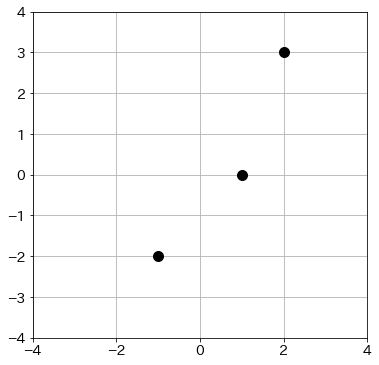

In [55]:
# p1, p2, c1_1 のそれぞれのfraw関数を呼び出す
ax = plt.subplot()
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

この段階でdraw関数は親で定義した関数が呼ばれていることがわかる

In [48]:
# Pointの子クラスCircleの定義その2
class Circle2(Point):
    # Circleはインスタンス生成時に引数x,y,rを持つ
    def __init__(self, x, y, r):
        # xとyは、親クラスの属性として設定
        super().__init__(x, y)
        # rは、Circleの属性として設定
        self.r = r
     
    # draw関数は、子クラス独自に円の描画を行う
    def draw(self):
        # 円の描画
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [49]:
# クラスCircle2からインスタンス変数c2_1を生成する
c2_1 = Circle2(1, 0, 2)

pdf-01-07.pdf


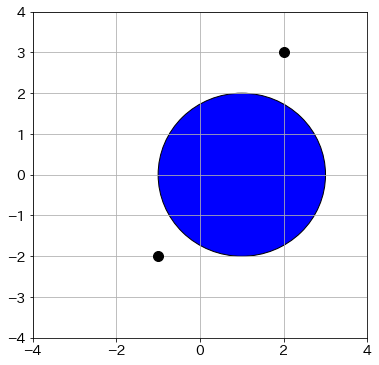

In [56]:
# p1, p2, c2_1 のそれぞれのfraw関数を呼び出す
ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

親のdarw関数の代わりに子のdraw関数が呼ばれたことがわかる  
では、この関数と親の関数を両方呼びたいときはどうしたらいいか

In [51]:
# Pointの子クラスCircleの定義その3
class Circle3(Point):
    # Circleはインスタンス生成時に引数x,y,rを持つ
    def __init__(self, x, y, r):
        # xとyは、親クラスの属性として設定
        super().__init__(x, y)
        # rは、Circleの属性として設定
        self.r = r
     
    # Circleのdraw関数は、親の関数呼び出しの後で、円の描画も独自に行う
    def draw(self):
        # 親クラスのdraw関数呼び出し
        super().draw()
        
        # 円の描画
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [52]:
# クラスCircle3からインスタンス変数c3_1を生成する
c3_1 = Circle3(1, 0, 2)

pdf-01-08.pdf


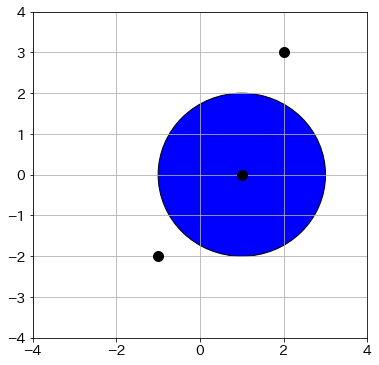

In [57]:
# p1, p2, c3_1 のそれぞれのfraw関数を呼び出す
ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

無事、両方を呼び出すことができた

## 1.5 インスタンスを関数として呼び出し可能にする

In [59]:
# 関数クラスHの定義
class H:
    def __call__(self, x):
        return 2*x**2 + 2
    
# Hクラスのインスタンスとしてhを生成
h = H() 

In [60]:
# hが関数として動作することを確認する

# numpy配列としてxの定義
x = np.arange(-2, 2.1, 0.25)
print(x)

# 関数hの呼び出し
y = h(x)
print(y)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


pdf-01-10.pdf


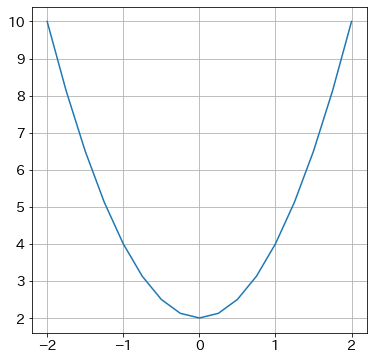

In [61]:
# グラフ描画
plt.plot(x, y)
plt.show()